6.3 对这 74 个国家与地区按人口出生率与死亡率进行快速聚类分析

In [21]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import linkage, fcluster, dendrogram
import matplotlib.pyplot as plt

data6_3 = [ 
    [ 1, 52, 30],
    [ 2, 50, 16],
    [ 3, 47, 23],
    [ 4, 22, 10],
    [ 5, 16,  8],
    [ 6, 12, 13],
    [ 7, 47, 19],
    [ 8, 12, 12],
    [ 9, 36, 10],
    [10, 17, 10],
    [11, 38, 15],
    [12, 42, 22],
    [13, 16,  7],
    [14, 22,  7],
    [15, 31, 11],
    [16, 26,  5],
    [17, 34, 10],
    [18, 20,  6],
    [19, 19, 11],
    [20, 42, 11],
    [21, 39, 13],
    [22, 48, 23],
    [23, 14, 11],
    [24, 12, 14],
    [25, 10, 12],
    [26, 46, 14],
    [27, 16,  9],
    [28, 40, 14],
    [29, 18, 12],
    [30, 36, 15],
    [31, 38, 16],
    [32, 42, 12],
    [33, 48, 14],
    [34, 14, 10],
    [35, 48, 23],
    [36, 16,  6],
    [37, 50, 14],
    [38, 43, 12],
    [39, 26,  6],
    [40, 47, 22],
    [41, 30,  6],
    [42, 40,  7],
    [43, 47, 16],
    [44, 45, 18],
    [45, 46, 20],
    [46, 13,  8],
    [47, 49, 22],
    [48, 44, 14],
    [49, 40, 13],
    [50, 34, 10],
    [51, 20,  9],
    [52, 19, 10],
    [53, 48, 14],
    [54, 19, 10],
    [55, 49, 19],
    [56, 36, 12],
    [57, 18,  8],
    [58, 26,  9],
    [59, 49, 17],
    [60, 12, 11],
    [61, 12,  9],
    [62, 47, 14],
    [63, 47, 17],
    [64, 34, 10],
    [65, 34, 12],
    [66, 18,  9],
    [67, 48, 17],
    [68, 12, 12],
    [69, 15,  9],
    [70, 50, 28],
    [71, 36,  6],
    [72, 42, 17],
    [73, 18,  8],
    [74, 45, 18],
]
df = pd.DataFrame(data6_3, columns=['id','x1','x2']).set_index('id')

(1)给出聚 3 类的结果，并画出 $(X_{1}, X_{2})$ 的散点图，该图是否反映了各类的集聚性？

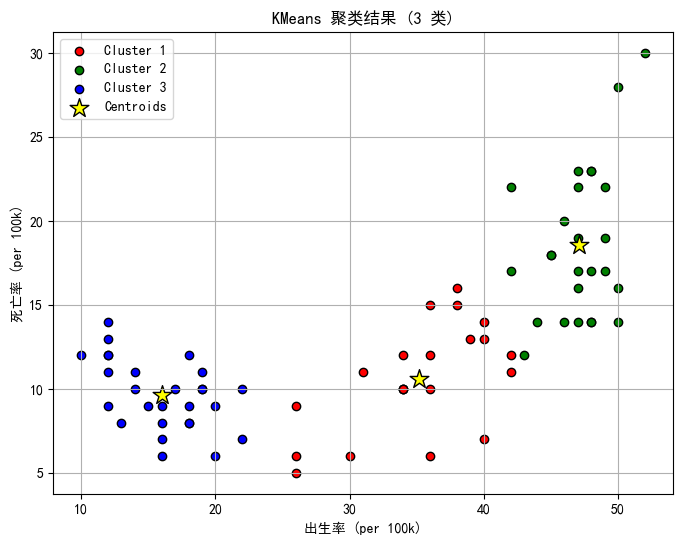

In [22]:
from sklearn.cluster import KMeans

# 提取特征矩阵
X = df[['x1','x2']].values

# KMeans 聚 3 类
km = KMeans(n_clusters=3, random_state=0)
labels = km.fit_predict(X)

# 可视化散点图
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
plt.figure(figsize=(8,6))
colors = ['red', 'green', 'blue']
for i in range(3):
    pts = X[labels == i]
    plt.scatter(pts[:,0], pts[:,1], c=colors[i], label=f'Cluster {i+1}', edgecolor='k')
cen = km.cluster_centers_
plt.scatter(cen[:,0], cen[:,1], c='yellow', marker='*', s=200, label='Centroids', edgecolor='k')

plt.xlabel('出生率 (per 100k)')
plt.ylabel('死亡率 (per 100k)')
plt.title('KMeans 聚类结果 (3 类)')
plt.legend()
plt.grid(True)
plt.show()


由散点图不同颜色的分布情况可以看出反映了各类的集聚性

(2)聚为 4 类的结果又如何？

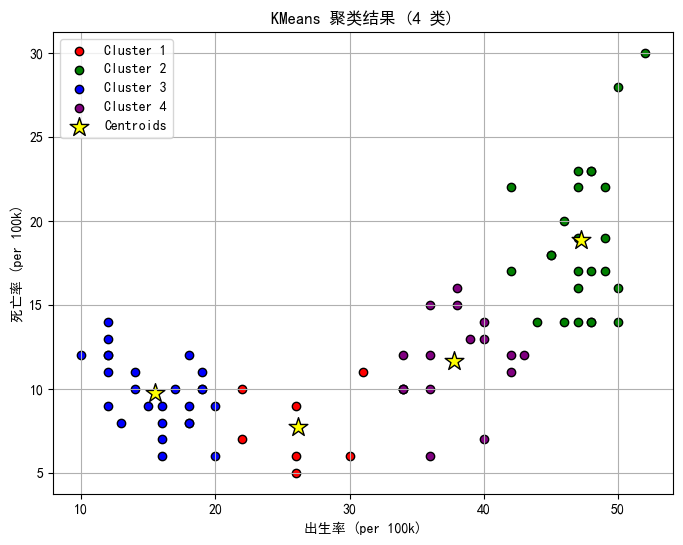

In [23]:
# KMeans 聚 4 类
km4 = KMeans(n_clusters=4, random_state=0)
labels4 = km4.fit_predict(X)

# 绘制散点图
plt.figure(figsize=(8,6))
colors = ['red', 'green', 'blue', 'purple']
for i in range(4):
    pts = X[labels4 == i]
    plt.scatter(pts[:,0], pts[:,1], c=colors[i], label=f'Cluster {i+1}', edgecolor='k')
# 绘制质心
cent4 = km4.cluster_centers_
plt.scatter(cent4[:,0], cent4[:,1], c='yellow', marker='*', s=200, label='Centroids', edgecolor='k')

plt.xlabel('出生率 (per 100k)')
plt.ylabel('死亡率 (per 100k)')
plt.title('KMeans 聚类结果 (4 类)')
plt.legend()
plt.grid(True)
plt.show()

(3)给出用绝对距离（$L_1$ 距离）快速聚类相应于 (1) 和 (2) 的结果

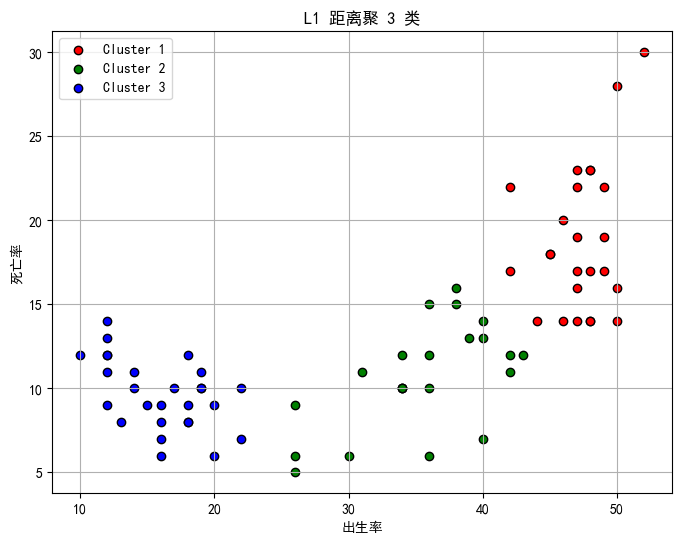

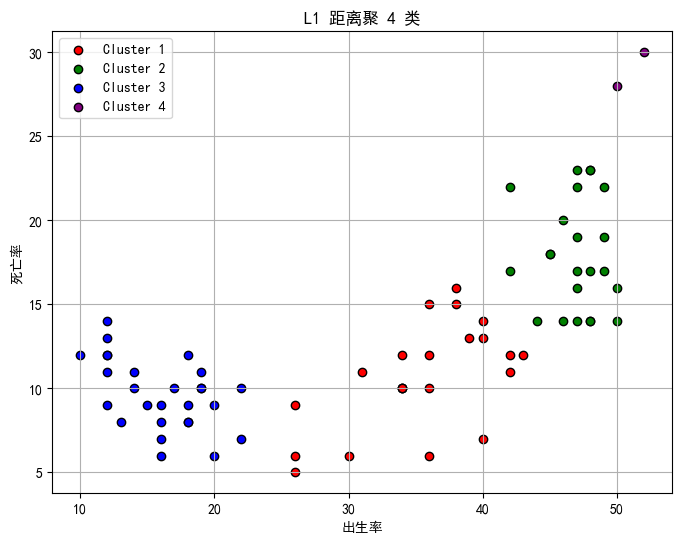

In [24]:
from sklearn.cluster import AgglomerativeClustering

# L1 距离聚 3 类 
agg3 = AgglomerativeClustering(
    n_clusters=3,
    metric='manhattan',
    linkage='complete'
)
labels3_l1 = agg3.fit_predict(X)

plt.figure(figsize=(8,6))
colors3 = ['red','green','blue']
for i in range(3):
    pts = X[labels3_l1 == i]
    plt.scatter(pts[:,0], pts[:,1], c=colors3[i], label=f'Cluster {i+1}', edgecolor='k')
plt.xlabel('出生率'); plt.ylabel('死亡率')
plt.title('L1 距离聚 3 类')
plt.legend(); plt.grid(True)
plt.show()

# L1 距离聚 4 类
agg4 = AgglomerativeClustering(
    n_clusters=4,
    metric='manhattan',
    linkage='complete'
)
labels4_l1 = agg4.fit_predict(X)

plt.figure(figsize=(8,6))
colors4 = ['red','green','blue','purple']
for i in range(4):
    pts = X[labels4_l1 == i]
    plt.scatter(pts[:,0], pts[:,1], c=colors4[i], label=f'Cluster {i+1}', edgecolor='k')
plt.xlabel('出生率'); plt.ylabel('死亡率')
plt.title('L1 距离聚 4 类')
plt.legend(); plt.grid(True)
plt.show()


L1 距离聚 3 类

散点图中各簇点依旧相对集中，说明用 L1 距离得到的三类同样具有较好的集聚性。

L1 距离聚 4 类

四簇分布与 L2 距离（KMeans）或 L2 层次聚类类似，只是边界略有不同。

新增一簇后，主要是将“中等出生率、低死亡率”区域再细分。总体仍能观察到“低—低”、“中偏低”、“中偏高”、“高—高”四个区块。

综上，用 L1 距离进行快速层次聚类时：
与 L2 距离（欧氏）下的 3 类或 4 类划分结果相似，都可清晰反映各类的集聚趋势。
只是当需要更细粒度时，可增至 4 类以区分“中间”不同程度

6.6  11 种语言的距离矩阵 $D$


====== 方法：最短距离法 (single linkage) ======
   idx1  idx2  distance  sample_count
0   1.0   2.0       1.0           2.0
1   6.0   7.0       1.0           2.0
2   5.0  12.0       1.0           3.0
3   0.0  11.0       2.0           3.0
4   8.0  13.0       3.0           4.0
5   4.0  14.0       4.0           4.0
6   3.0  16.0       5.0           5.0
7  15.0  17.0       5.0           9.0
8   9.0  18.0       8.0          10.0
9  10.0  19.0       8.0          11.0


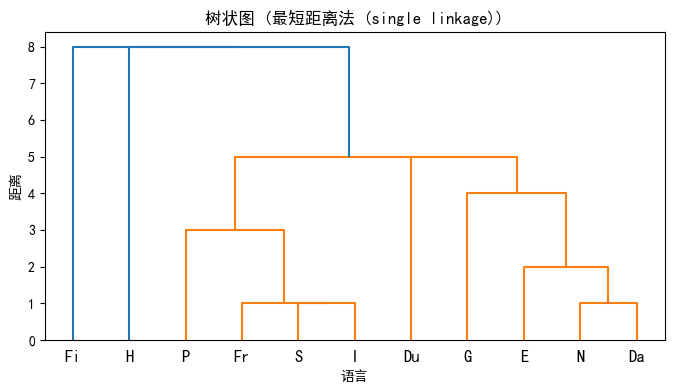


====== 方法：最长距离法 (complete linkage) ======
   idx1  idx2  distance  sample_count
0   1.0   2.0       1.0           2.0
1   5.0   7.0       1.0           2.0
2   0.0  11.0       2.0           3.0
3   6.0  12.0       2.0           3.0
4   3.0   4.0       5.0           2.0
5   8.0  14.0       5.0           4.0
6  13.0  15.0       7.0           5.0
7   9.0  10.0       8.0           2.0
8  16.0  17.0      10.0           9.0
9  18.0  19.0      10.0          11.0


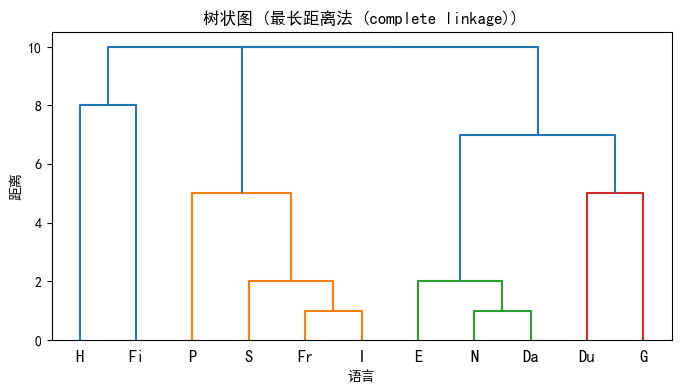


====== 方法：类平均距离法 (average linkage) ======
   idx1  idx2  distance  sample_count
0   1.0   2.0  1.000000           2.0
1   6.0   7.0  1.000000           2.0
2   5.0  12.0  1.500000           3.0
3   0.0  11.0  2.000000           3.0
4   8.0  13.0  4.000000           4.0
5   4.0  14.0  5.000000           4.0
6   3.0  16.0  5.750000           5.0
7  15.0  17.0  6.900000           9.0
8   9.0  10.0  8.000000           2.0
9  18.0  19.0  9.166667          11.0


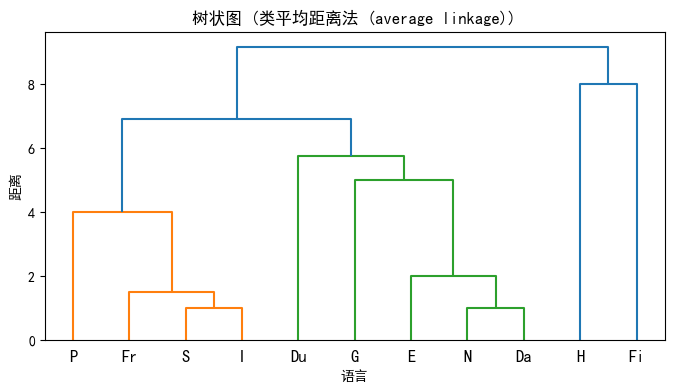


====== 方法：重心距离法 (centroid linkage) ======
   idx1  idx2  distance  sample_count
0   1.0   2.0  1.000000           2.0
1   5.0   7.0  1.000000           2.0
2   6.0  12.0  1.500000           3.0
3   0.0  11.0  1.936492           3.0
4   8.0  13.0  4.000000           4.0
5   4.0  14.0  4.966555           4.0
6   3.0  16.0  5.326819           5.0
7  15.0  17.0  6.095900           9.0
8   9.0  10.0  8.000000           2.0
9  18.0  19.0  7.262707          11.0


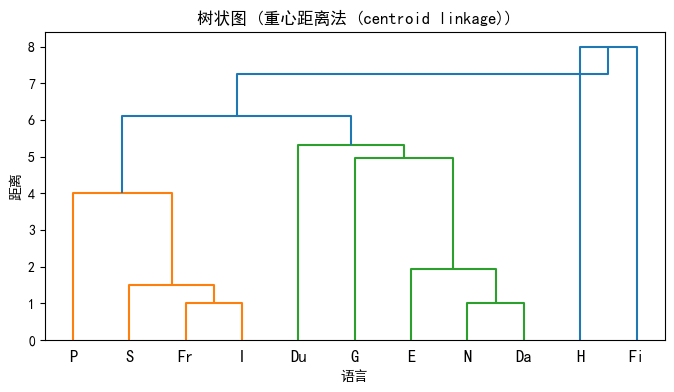

In [25]:
from scipy.cluster.hierarchy import linkage, dendrogram
from scipy.spatial.distance import squareform

# 距离矩阵 D_full 及标签
D_full = np.array([
    [ 0,  2,  2,  7,  6,  6,  6,  6,  7,  9,  9],
    [ 2,  0,  1,  5,  4,  6,  6,  6,  7,  8,  9],
    [ 2,  1,  0,  6,  5,  6,  5,  5,  6,  8,  9],
    [ 7,  5,  6,  0,  5,  9,  9,  9, 10,  9,  9],
    [ 6,  4,  5,  5,  0,  7,  7,  7,  8, 10,  9],
    [ 6,  6,  6,  9,  7,  0,  2,  1,  5, 10,  9],
    [ 6,  6,  5,  9,  7,  2,  0,  1,  3, 10,  9],
    [ 6,  6,  5,  9,  7,  1,  1,  0,  4, 10,  9],
    [ 7,  7,  6, 10,  8,  5,  3,  4,  0, 10,  9],
    [ 9,  8,  8,  9, 10, 10, 10, 10, 10,  0,  8],
    [ 9,  9,  9,  9,  9,  9,  9,  9,  9,  8,  0]
])
labels = ['E','N','Da','Du','G','Fr','S','I','P','H','Fi']

# 转换为 scipy 距离的 condensed form
condensed = squareform(D_full)

methods = {
    'single': '最短距离法 (single linkage)',
    'complete': '最长距离法 (complete linkage)',
    'average': '类平均距离法 (average linkage)',
    'centroid': '重心距离法 (centroid linkage)'
}

for method, desc in methods.items():
    print(f"\n====== 方法：{desc} ======")
    Z = linkage(condensed, method=method)
    # 打印聚类过程（前 10 行，完整可参看）
    z_df = pd.DataFrame(Z, columns=['idx1','idx2','distance','sample_count'])
    print(z_df.head(15))
    
    # 绘制树状图
    plt.figure(figsize=(8, 4))
    dendrogram(Z, labels=labels, color_threshold=None)
    plt.title(f"树状图 ({desc})")
    plt.xlabel("语言")
    plt.ylabel("距离")
    plt.show()


6.8用适当变换将$R$变为距离矩阵，作如下分析：

(1)用最短距离法进行变量聚类，并画出谱系图； 

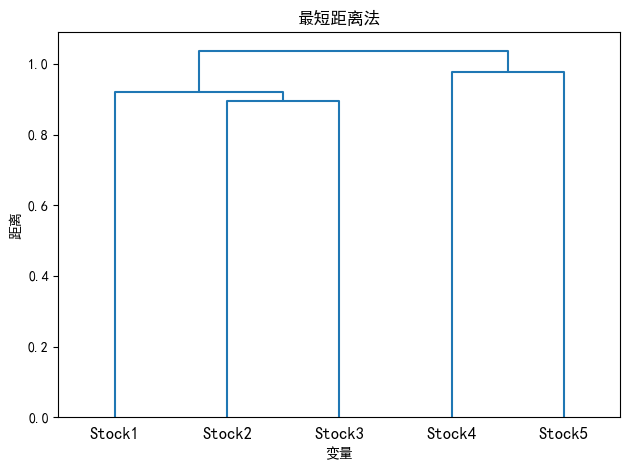

In [26]:
from scipy.cluster.hierarchy import linkage, dendrogram
from scipy.spatial.distance import squareform

R = np.array([
    [1.000, 0.577, 0.509, 0.387, 0.462],
    [0.577, 1.000, 0.599, 0.389, 0.322],
    [0.509, 0.599, 1.000, 0.436, 0.426],
    [0.387, 0.389, 0.436, 1.000, 0.523],
    [0.462, 0.322, 0.426, 0.523, 1.000]
])

D = np.sqrt(2 * (1 - R))
dist_condensed = squareform(D, checks=False)
Z = linkage(dist_condensed, method='single')

labels = ['Stock1', 'Stock2', 'Stock3', 'Stock4', 'Stock5']  

dendrogram(Z, labels=labels, orientation='top', distance_sort='ascending')
plt.title('最短距离法')
plt.xlabel('变量')
plt.ylabel('距离')
plt.tight_layout()
plt.show()


(2)用最长距离法进行变量聚类，并画出谱系图；  

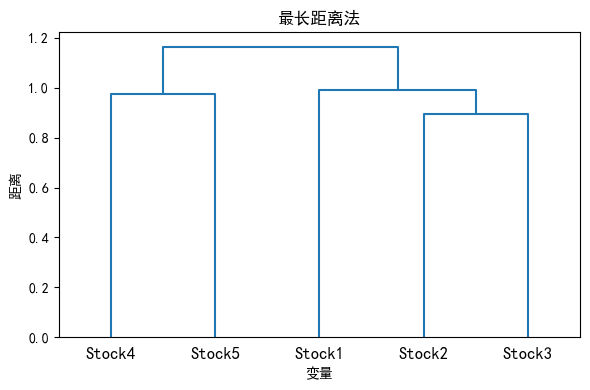

In [27]:
Z = linkage(dist_condensed, method='complete')

labels_chinese = ['Stock1', 'Stock2', 'Stock3', 'Stock4', 'Stock5']
plt.figure(figsize=(6, 4))
dendrogram(
    Z,
    labels=labels_chinese,
    orientation='top',
    distance_sort='ascending'
)
plt.title('最长距离法')
plt.xlabel('变量')
plt.ylabel('距离')
plt.tight_layout()
plt.show()


(3)用类平均距离法进行变量聚类，并画出谱系图。

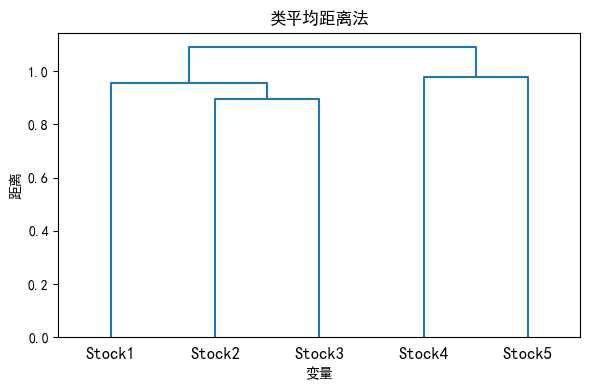

In [28]:
Z = linkage(dist_condensed, method='average')

labels_chinese = ['Stock1', 'Stock2', 'Stock3', 'Stock4', 'Stock5']
plt.figure(figsize=(6, 4))
dendrogram(
    Z,
    labels=labels_chinese,
    orientation='top',
    distance_sort='ascending'
)
plt.title('类平均距离法')
plt.xlabel('变量')
plt.ylabel('距离')
plt.tight_layout()
plt.show()
